In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df= pd.read_csv(r'Super_Store_data.csv',sep=',', encoding='latin')

In [3]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


# Data Wrangling

In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
for i in df.columns:  
    print(i)
    print('_'*20)
    print(df[i].unique())
    print('*'*65)
    print('\n')

Row ID
____________________
[   1    2    4 ... 9981 9990 9991]
*****************************************************************


Order ID
____________________
['CA-2016-152156' 'US-2015-108966' 'CA-2014-115812' ... 'US-2015-151435'
 'CA-2014-110422' 'CA-2017-121258']
*****************************************************************


Order Date
____________________
['11/8/2016' '10/11/2015' '6/9/2014' '7/16/2017' '9/25/2015' '9/17/2015'
 '12/8/2016' '12/27/2015' '4/18/2015' '6/17/2016' '11/24/2015' '4/30/2015'
 '4/26/2015' '12/9/2017' '11/26/2014' '5/28/2017' '1/31/2015' '11/9/2017'
 '11/13/2015' '12/25/2017' '3/2/2015' '6/12/2016' '12/26/2014' '9/20/2014'
 '11/6/2016' '10/13/2016' '9/5/2016' '10/22/2014' '12/5/2016' '3/1/2014'
 '9/8/2014' '8/5/2014' '11/21/2015' '10/12/2015' '8/3/2014' '6/3/2017'
 '1/2/2015' '12/24/2015' '8/9/2015' '2/28/2015' '4/7/2017' '6/4/2016'
 '6/1/2014' '12/10/2016' '11/28/2015' '7/30/2015' '11/2/2015' '11/20/2016'
 '10/28/2016' '11/19/2017' '5/4/2015' '9/12

In [6]:
df.drop(columns=['Row ID','Order ID','Customer ID','Customer Name','Postal Code','Product ID','Product Name','Country','Category','City'],inplace=True)

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
df.head(3)

,Order Date,Ship Date,Ship Mode,Segment,State,Region,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Bookcases,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Chairs,731.9400,3,0.00,219.5820
2,10/11/2015,10/18/2015,Standard Class,Consumer,Florida,South,Tables,957.5775,5,0.45,-383.0310


In [9]:
df['profit_Loss'] = df['Profit'].copy()

In [10]:
df.loc[(df['Profit'] <=0),  'profit_Loss'] = 'Loss' 
df.loc[(df['Profit'] >0),  'profit_Loss'] = 'Profit' 

In [11]:
df.head(5)

,Order Date,Ship Date,Ship Mode,Segment,State,Region,Sub-Category,Sales,Quantity,Discount,Profit,profit_Loss
0,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Bookcases,261.9600,2,0.00,41.9136,Profit
1,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Chairs,731.9400,3,0.00,219.5820,Profit
2,10/11/2015,10/18/2015,Standard Class,Consumer,Florida,South,Tables,957.5775,5,0.45,-383.0310,Loss
3,6/9/2014,6/14/2014,Standard Class,Consumer,California,West,Furnishings,48.8600,7,0.00,14.1694,Profit
4,6/9/2014,6/14/2014,Standard Class,Consumer,California,West,Tables,1706.1840,9,0.20,85.3092,Profit


In [12]:
df['Discount'] = round((df['Discount'])*df['Sales'],1)
df.head(2)

,Order Date,Ship Date,Ship Mode,Segment,State,Region,Sub-Category,Sales,Quantity,Discount,Profit,profit_Loss
0,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Bookcases,261.96,2,0.0,41.9136,Profit
1,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Chairs,731.94,3,0.0,219.5820,Profit


In [13]:
df['Net_Sales'] = ((df['Sales']*df['Quantity'])-df['Discount'])+df['Profit']

In [14]:
df.head(5)

,Order Date,Ship Date,Ship Mode,Segment,State,Region,Sub-Category,Sales,Quantity,Discount,Profit,profit_Loss,Net_Sales
0,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Bookcases,261.9600,2,0.0,41.9136,Profit,565.8336
1,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Chairs,731.9400,3,0.0,219.5820,Profit,2415.4020
2,10/11/2015,10/18/2015,Standard Class,Consumer,Florida,South,Tables,957.5775,5,430.9,-383.0310,Loss,3973.9565
3,6/9/2014,6/14/2014,Standard Class,Consumer,California,West,Furnishings,48.8600,7,0.0,14.1694,Profit,356.1894
4,6/9/2014,6/14/2014,Standard Class,Consumer,California,West,Tables,1706.1840,9,341.2,85.3092,Profit,15099.7652


In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    2121 non-null   datetime64[ns]
 1   Ship Date     2121 non-null   datetime64[ns]
 2   Ship Mode     2121 non-null   object        
 3   Segment       2121 non-null   object        
 4   State         2121 non-null   object        
 5   Region        2121 non-null   object        
 6   Sub-Category  2121 non-null   object        
 7   Sales         2121 non-null   float64       
 8   Quantity      2121 non-null   int64         
 9   Discount      2121 non-null   float64       
 10  Profit        2121 non-null   float64       
 11  profit_Loss   2121 non-null   object        
 12  Net_Sales     2121 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 215.5+ KB


In [17]:
df.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Net_Sales
count,2121,2121,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,2016-04-30 03:54:13.748231680,2016-05-04 01:54:44.299858432,349.834887,3.785007,58.234559,8.699327,1769.991043
min,2014-01-06 00:00:00,2014-01-10 00:00:00,1.892000,1.000000,0.000000,-1862.312400,-83.966600
25%,2015-05-26 00:00:00,2015-05-31 00:00:00,47.040000,2.000000,0.000000,-12.849000,114.513400
50%,2016-06-20 00:00:00,2016-06-23 00:00:00,182.220000,3.000000,11.200000,7.774800,473.140700
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,435.168000,5.000000,70.700000,33.726600,1612.894600
max,2017-12-30 00:00:00,2018-01-05 00:00:00,4416.174000,14.000000,1719.100000,1013.127000,52287.959600
std,NaN,NaN,503.179145,2.251620,115.236491,136.049246,3878.556821


In [18]:
numerical_list = df.select_dtypes(['int64','float64','int32','float32'])

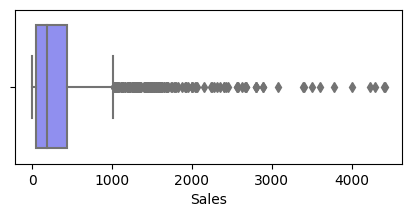

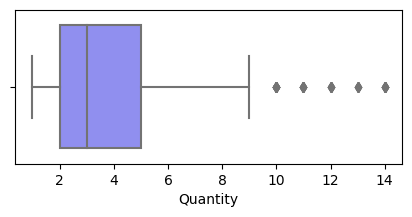

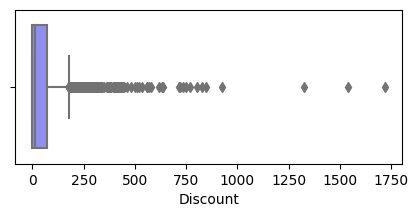

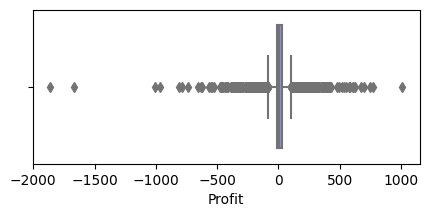

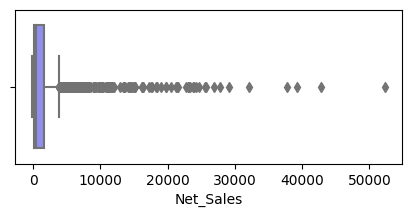

In [19]:
for var in numerical_list:
    plt.figure(figsize=(5,2))
    sb.boxplot(x=var,data=df,palette='cool')
    plt.show()

In [20]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [21]:
Sales_Zscore = detect_outliers(df['Sales'])
min(Sales_Zscore)

1875.258

In [22]:
Quantity_Zscore = detect_outliers(df['Quantity'])
min(Quantity_Zscore)

11

In [23]:
df.shape

(2121, 13)

In [24]:
df = df[df['Sales']<1875.258]
df = df[df['Quantity']<11]


In [25]:
df.shape

(2054, 13)

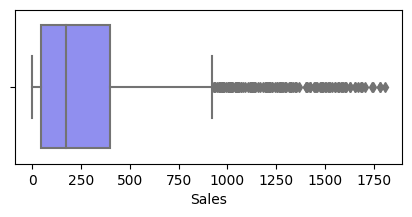

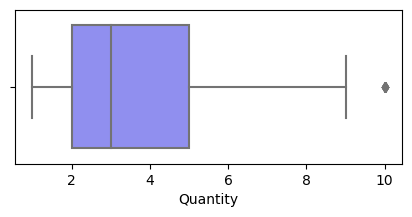

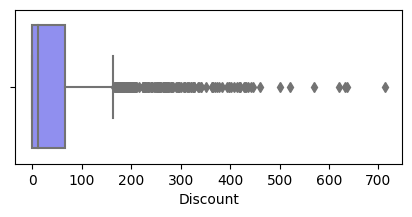

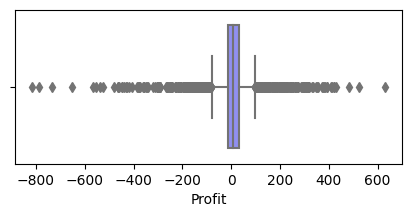

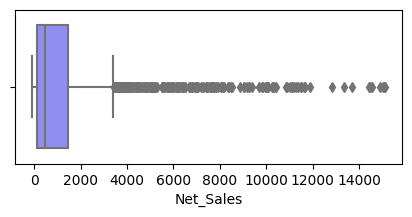

In [26]:
for var in numerical_list:
    plt.figure(figsize=(5,2))
    sb.boxplot(x=var,data=df,palette='cool')
    plt.show()

In [27]:
df['Year']= df['Order Date'].dt.year
df['Month']= df['Order Date'].dt.month
df['Weekday']= df['Order Date'].dt.weekday

In [28]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'State', 'Region',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'profit_Loss', 'Net_Sales', 'Year', 'Month', 'Weekday'],
      dtype='object')

# EDA

In [29]:
df.head(3)

,Order Date,Ship Date,Ship Mode,Segment,State,Region,Sub-Category,Sales,Quantity,Discount,Profit,profit_Loss,Net_Sales,Year,Month,Weekday
0,2016-11-08,2016-11-11,Second Class,Consumer,Kentucky,South,Bookcases,261.9600,2,0.0,41.9136,Profit,565.8336,2016,11,1
1,2016-11-08,2016-11-11,Second Class,Consumer,Kentucky,South,Chairs,731.9400,3,0.0,219.5820,Profit,2415.4020,2016,11,1
2,2015-10-11,2015-10-18,Standard Class,Consumer,Florida,South,Tables,957.5775,5,430.9,-383.0310,Loss,3973.9565,2015,10,6


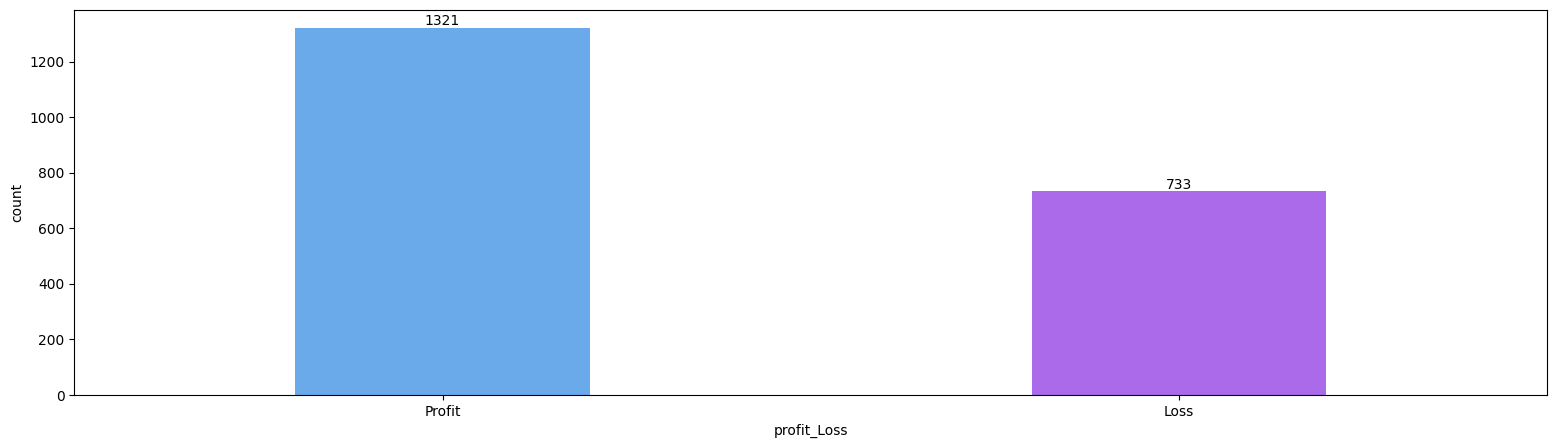

In [30]:
plt.figure(figsize=(19,5))

a= sb.countplot(x='profit_Loss',data=df,palette='cool',width=0.4)
for i in a.containers:
    a.bar_label(i)

plt.show()

In [31]:
loss_df = df[df['profit_Loss']=='Loss']
loss_df.shape

(733, 16)

In [32]:
df['Year'].unique()

array([2016, 2015, 2014, 2017])

In [33]:
df['profit_Loss'] = df['profit_Loss'].apply(lambda x:0 if x=='Profit' else 1)

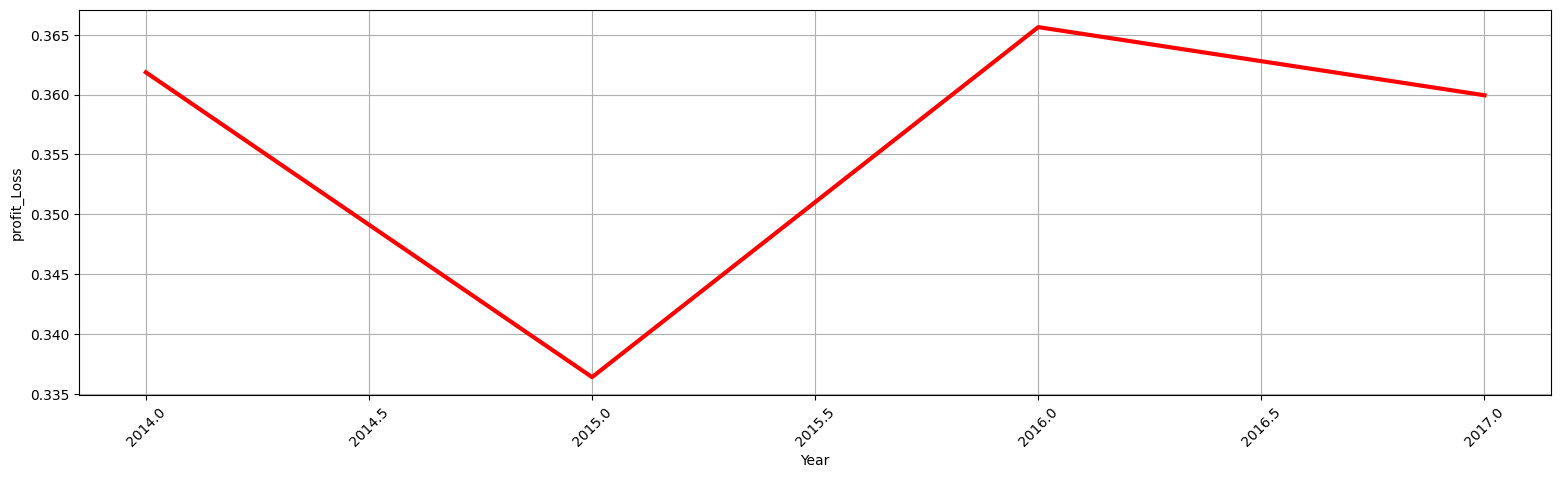

In [34]:
plt.figure(figsize=(19,5))
a = df.groupby('Year',as_index=False)['profit_Loss'].mean()
b = sb.lineplot(x='Year',y='profit_Loss',data=a,palette='autumn',color='r',linewidth=3)
for i in b.containers:
    b.bar_label(i)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [35]:
loss_df['profit_Loss'] = loss_df['profit_Loss'].apply(lambda x:0 if x=='Profit' else 1)

Ship Mode
Standard Class    59.0
Second Class      20.0
First Class       16.0
Same Day           6.0
Name: proportion, dtype: float64 0


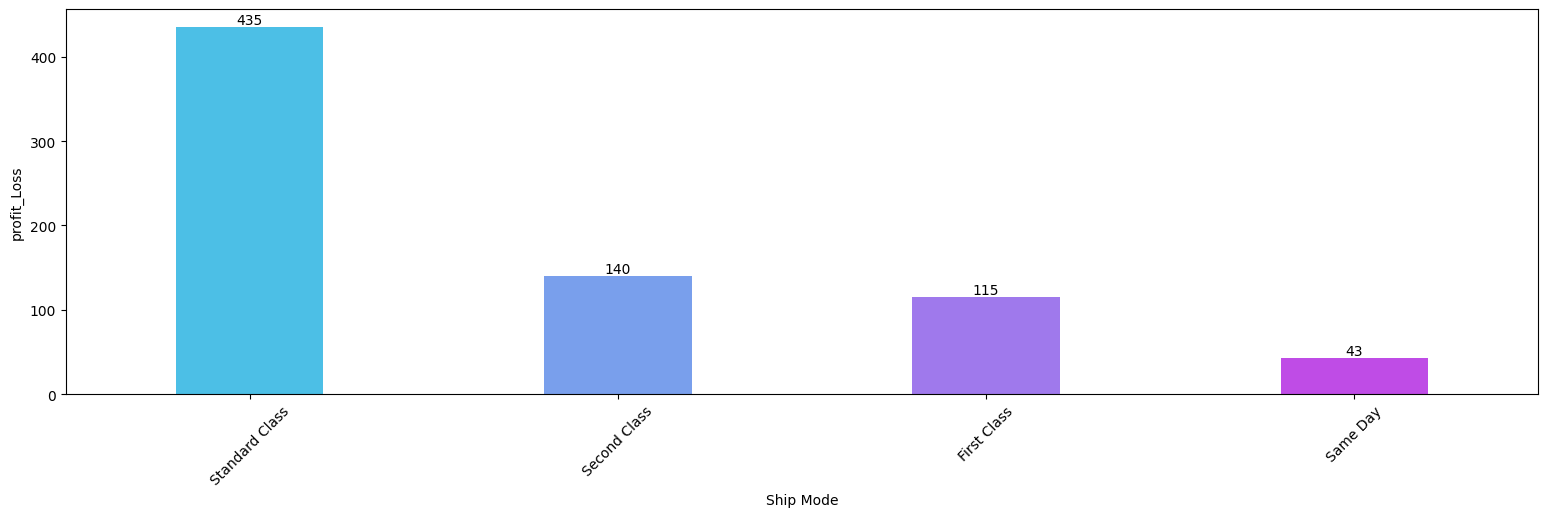

Segment
Consumer       53.0
Corporate      31.0
Home Office    17.0
Name: proportion, dtype: float64 0


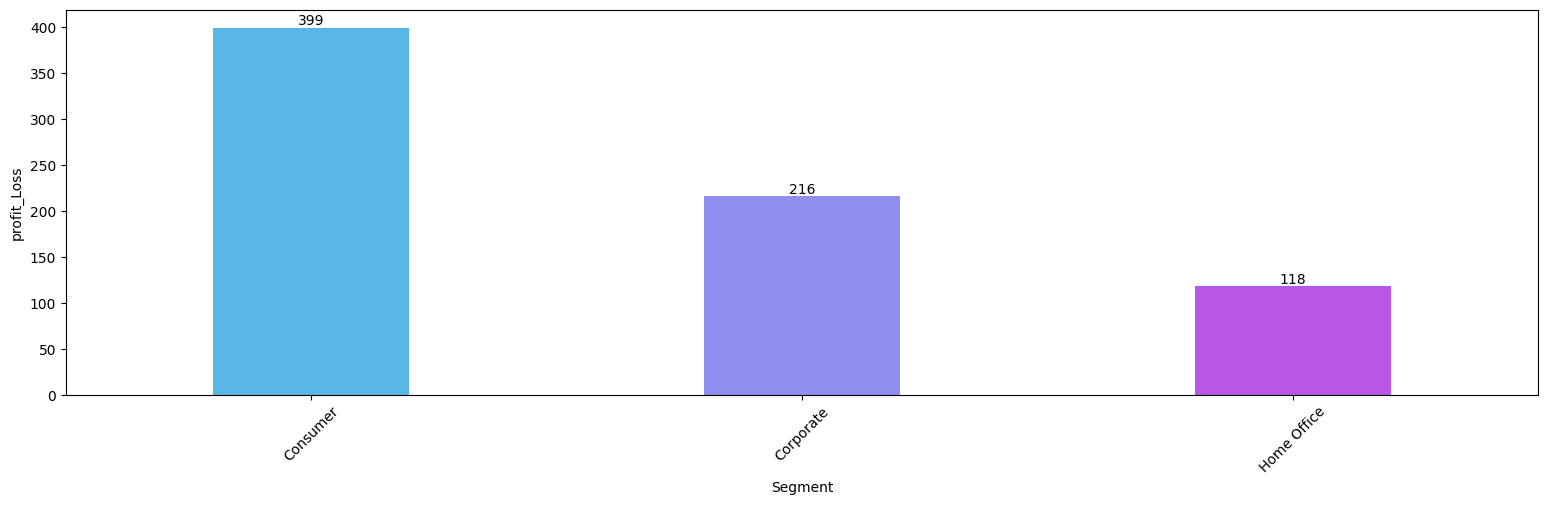

State
California              21.0
New York                11.0
Texas                   10.0
Illinois                 6.0
Pennsylvania             6.0
Washington               5.0
Ohio                     4.0
Florida                  4.0
Colorado                 2.0
Arizona                  2.0
Virginia                 2.0
Michigan                 2.0
Tennessee                2.0
North Carolina           2.0
Massachusetts            2.0
Georgia                  2.0
Wisconsin                1.0
Kentucky                 1.0
Maryland                 1.0
New Jersey               1.0
Oregon                   1.0
Indiana                  1.0
Delaware                 1.0
Rhode Island             1.0
Oklahoma                 1.0
Connecticut              1.0
Missouri                 1.0
Minnesota                1.0
Louisiana                1.0
Alabama                  0.0
Arkansas                 0.0
Nevada                   0.0
Mississippi              0.0
Utah                     0.0
New Hamp

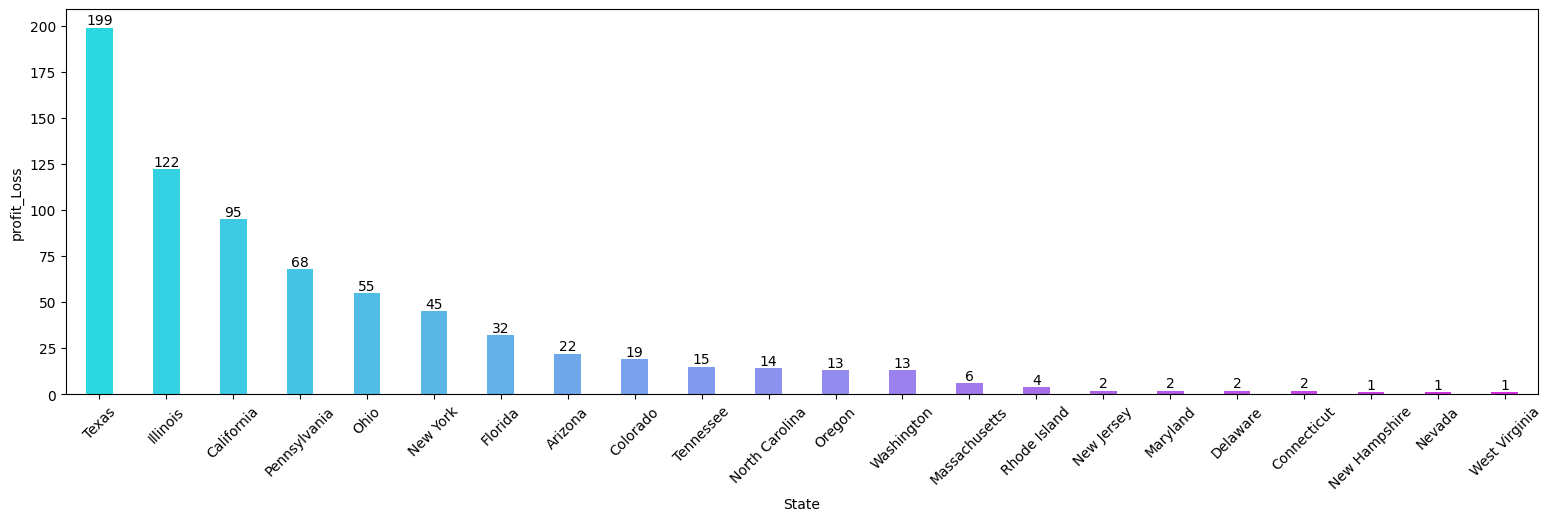

Region
West       33.0
East       28.0
Central    23.0
South      16.0
Name: proportion, dtype: float64 0


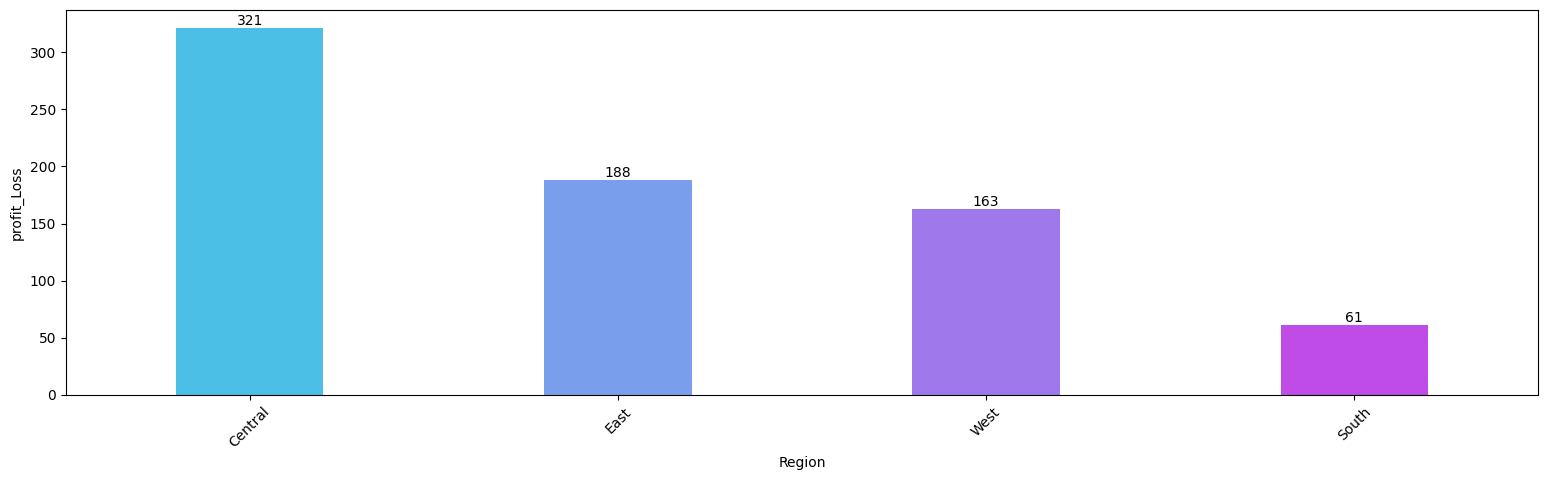

Sub-Category
Furnishings    46.0
Chairs         29.0
Tables         15.0
Bookcases      11.0
Name: proportion, dtype: float64 0


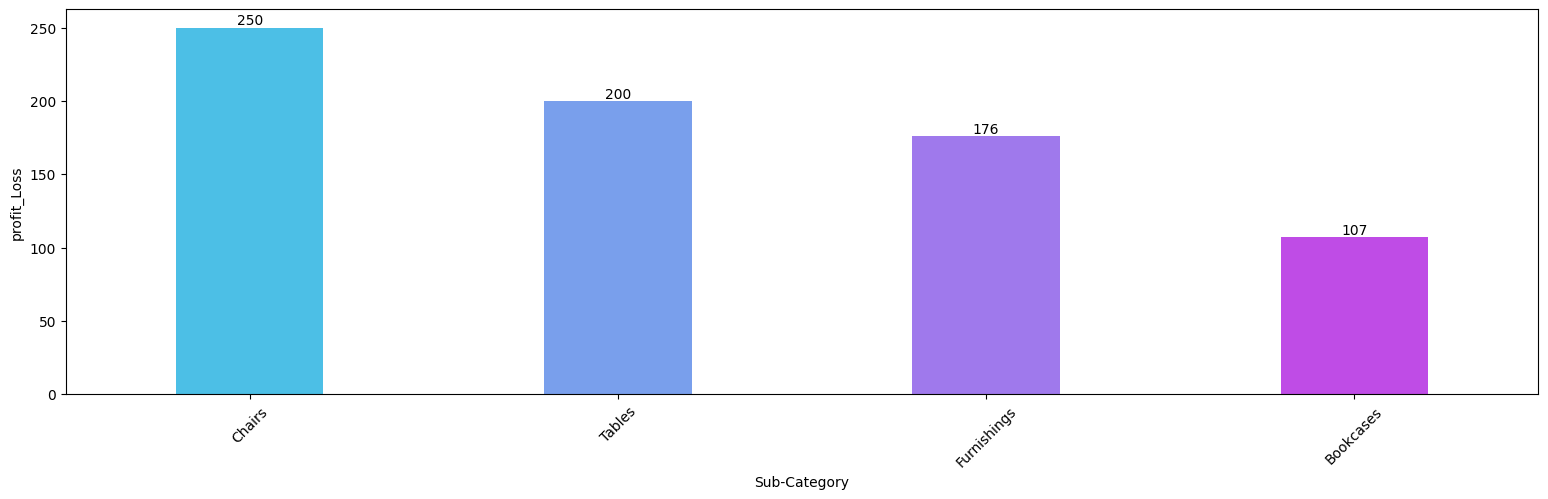

Year
2017    32.0
2016    27.0
2015    21.0
2014    20.0
Name: proportion, dtype: float64 0


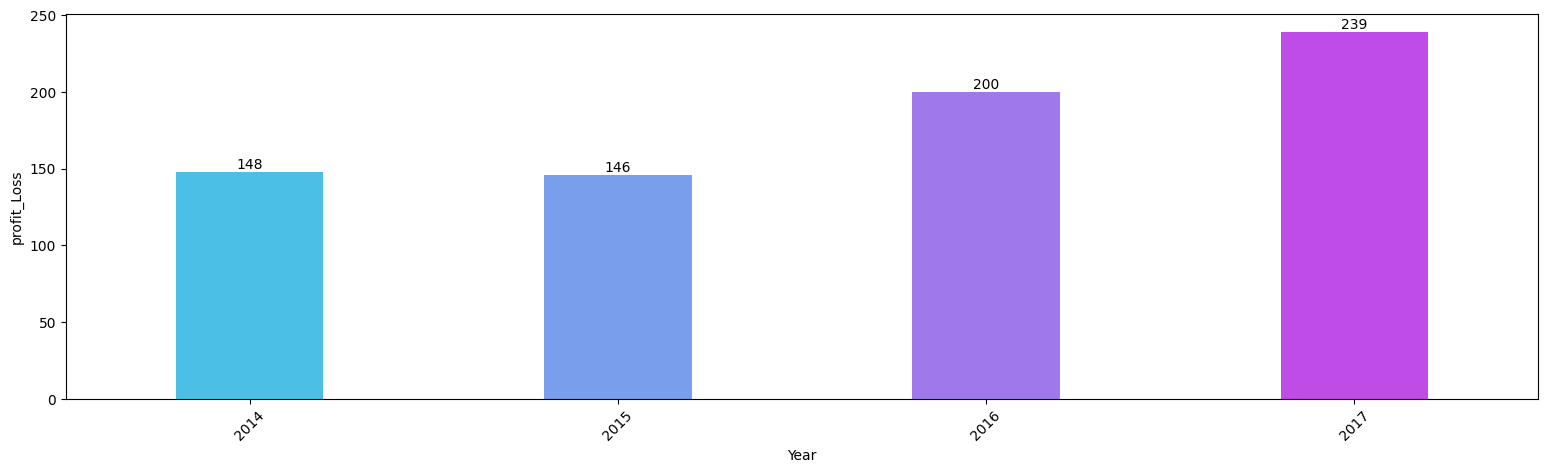

Month
12    15.0
11    15.0
9     13.0
10     9.0
7      8.0
5      7.0
6      7.0
3      7.0
4      7.0
8      6.0
1      4.0
2      3.0
Name: proportion, dtype: float64 0


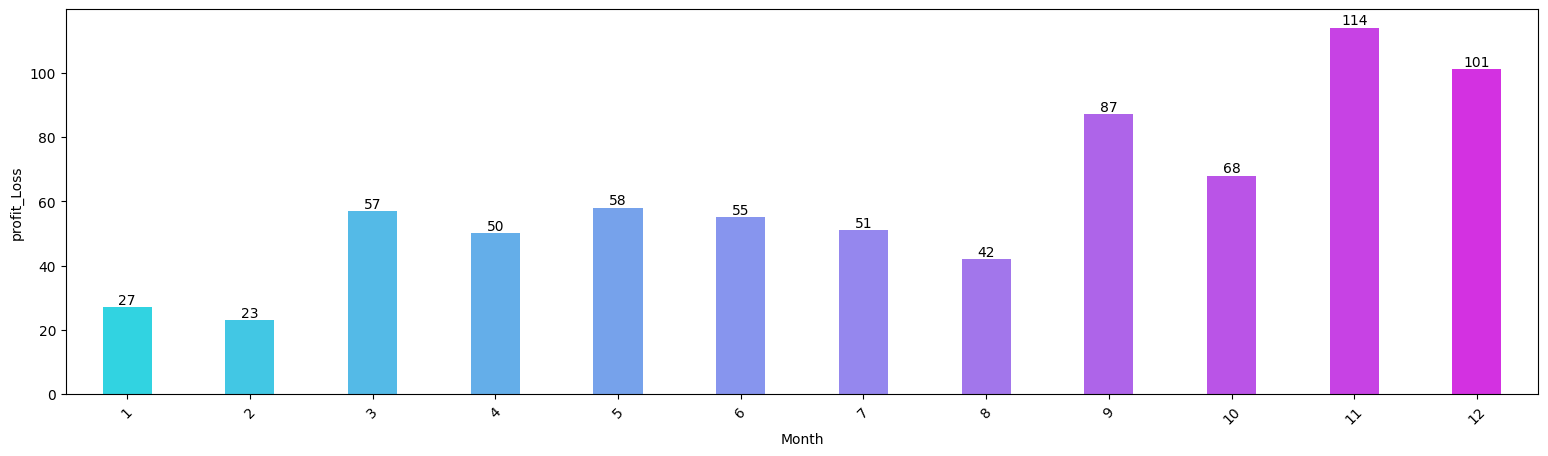

Weekday
0    20.0
4    18.0
6    17.0
5    16.0
3    15.0
1    12.0
2     4.0
Name: proportion, dtype: float64 0


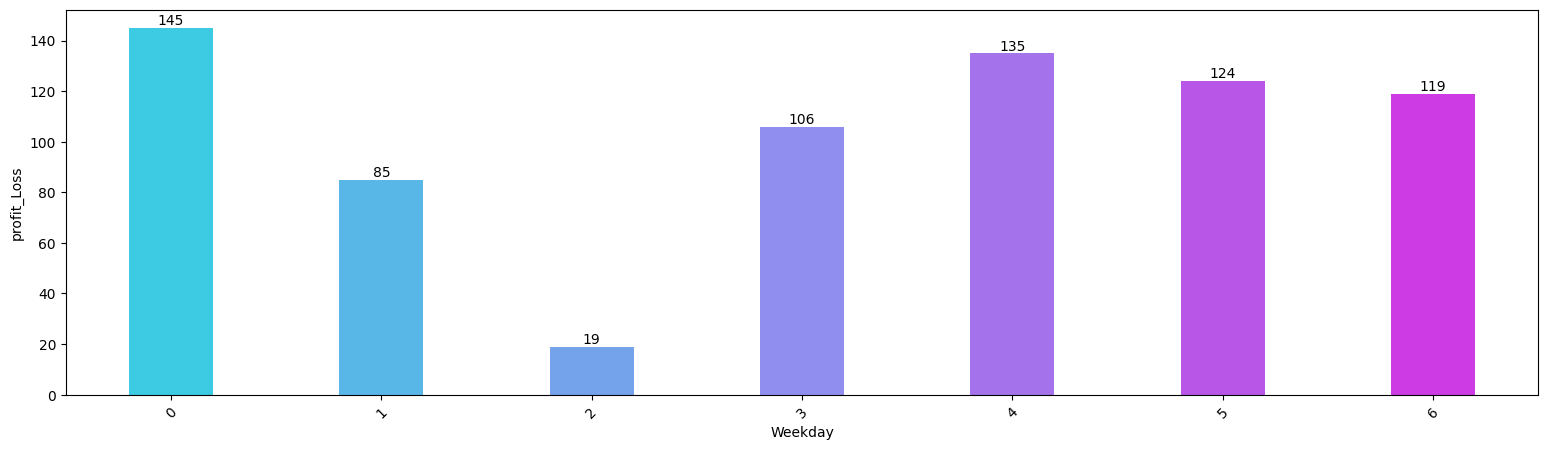

In [36]:
col=['Ship Mode', 'Segment', 'State', 'Region',
       'Sub-Category', 'Year', 'Month', 'Weekday']
for var in col:
    print(round(df[var].value_counts(normalize=True)*100),0)
    plt.figure(figsize=(19,5))
    a = loss_df.groupby(var,as_index=False)['profit_Loss'].sum().sort_values(by='profit_Loss',ascending=False)
    b = sb.barplot(x=var,y='profit_Loss',data=a,palette='cool',width=0.4)
    for i in b.containers:
        b.bar_label(i)
    plt.xticks(rotation=45)
    plt.show()

#### CHAIR and TABLE have been the cause of loss in CENTRAL AREA

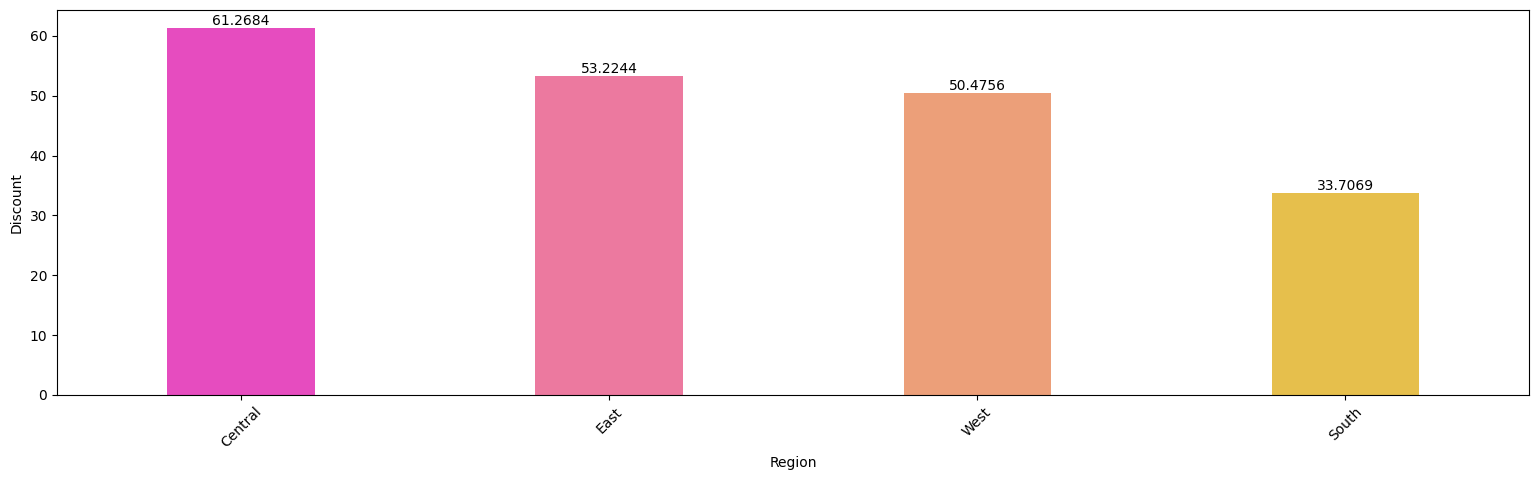

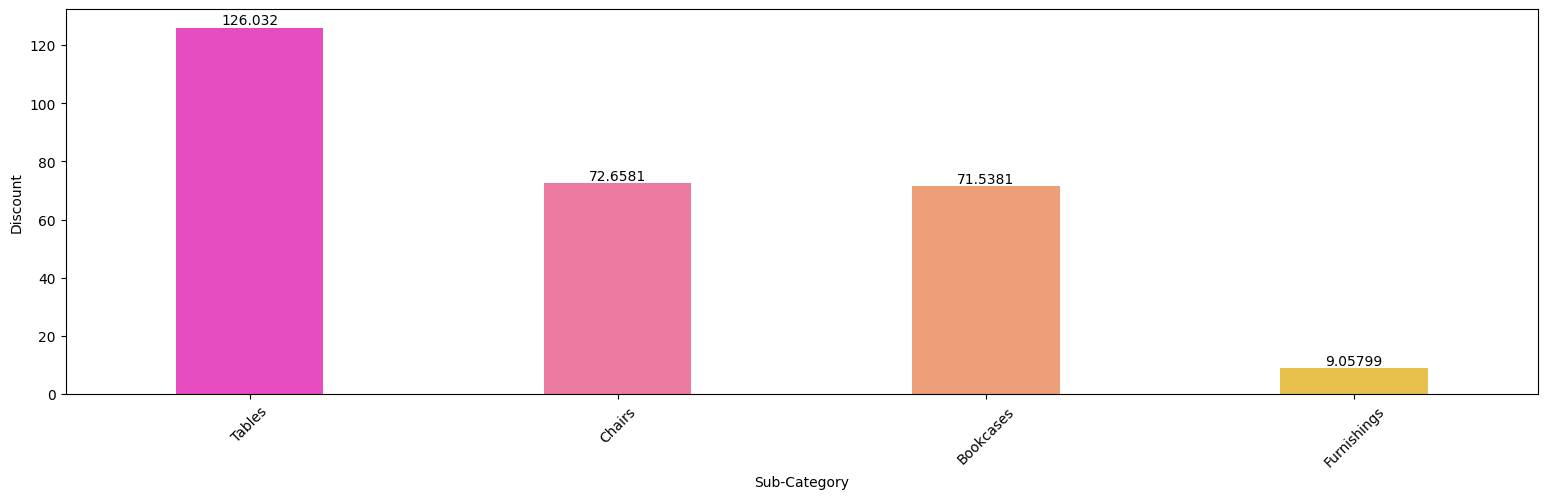

In [37]:
col1=['Region','Sub-Category']
for var in col1:
    plt.figure(figsize=(19,5))
    a = df.groupby(var,as_index=False)['Discount'].mean().sort_values(by='Discount',ascending=False)
    b = sb.barplot(x=var,y='Discount',data=a,palette='spring',width=0.4)
    for i in b.containers:
        b.bar_label(i)
    plt.xticks(rotation=45)
    plt.show()

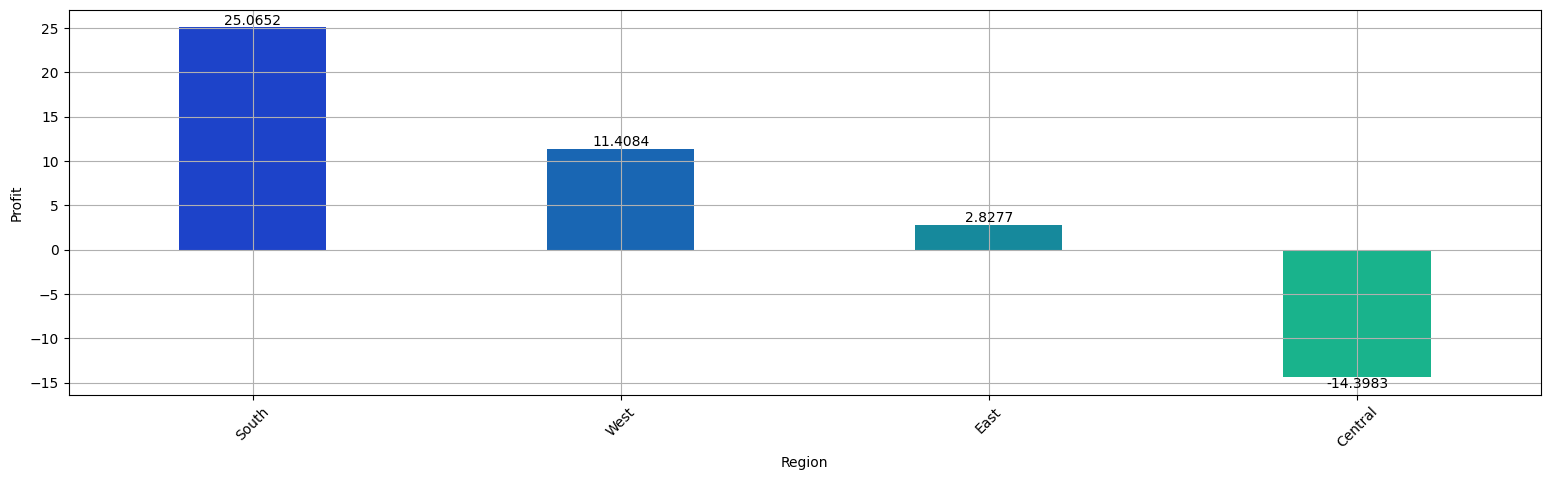

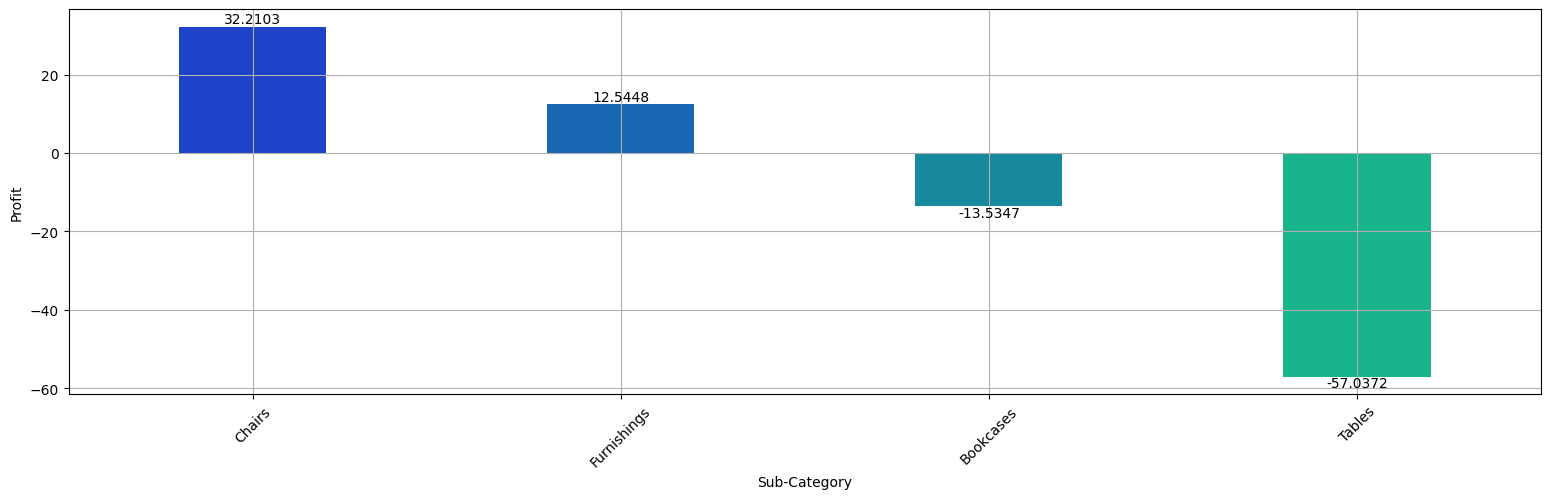

In [38]:
col1=['Region','Sub-Category']
for var in col1:
    plt.figure(figsize=(19,5))
    a = df.groupby(var,as_index=False)['Profit'].mean().sort_values(by='Profit',ascending=False)
    b = sb.barplot(x=var,y='Profit',data=a,palette='winter',width=0.4)
    for i in b.containers:
        b.bar_label(i)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

### Final Analysis = TABLE has been the cause of loss in CENTRAL AREA for HIGH DISCOUNT

# MACHINE LEARNING

In [39]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'State', 'Region',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'profit_Loss', 'Net_Sales', 'Year', 'Month', 'Weekday'],
      dtype='object')

In [40]:
df.head(2)

,Order Date,Ship Date,Ship Mode,Segment,State,Region,Sub-Category,Sales,Quantity,Discount,Profit,profit_Loss,Net_Sales,Year,Month,Weekday
0,2016-11-08,2016-11-11,Second Class,Consumer,Kentucky,South,Bookcases,261.96,2,0.0,41.9136,0,565.8336,2016,11,1
1,2016-11-08,2016-11-11,Second Class,Consumer,Kentucky,South,Chairs,731.94,3,0.0,219.5820,0,2415.4020,2016,11,1


In [41]:
df.set_index('Order Date',inplace=True)
df.head(2)

,Ship Date,Ship Mode,Segment,State,Region,Sub-Category,Sales,Quantity,Discount,Profit,profit_Loss,Net_Sales,Year,Month,Weekday
Order Date,,,,,,,,,,,,,,,
2016-11-08,2016-11-11,Second Class,Consumer,Kentucky,South,Bookcases,261.96,2,0.0,41.9136,0,565.8336,2016,11,1
2016-11-08,2016-11-11,Second Class,Consumer,Kentucky,South,Chairs,731.94,3,0.0,219.5820,0,2415.4020,2016,11,1


In [42]:
df.drop(columns=['Ship Date','Ship Mode','Segment','State','Region','Sub-Category','Sales','Quantity','Discount','Profit','profit_Loss','Year','Month','Weekday'],inplace=True)

In [43]:
df.head(2)

,Net_Sales
Order Date,
2016-11-08,565.8336
2016-11-08,2415.4020


In [44]:
df.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2015-10-11', '2014-06-09',
               '2014-06-09', '2017-07-16', '2015-09-25', '2015-09-17',
               '2016-12-08', '2015-12-27',
               ...
               '2016-09-04', '2015-11-13', '2016-06-03', '2016-12-12',
               '2015-12-14', '2015-03-19', '2016-12-05', '2015-09-06',
               '2014-01-21', '2017-02-26'],
              dtype='datetime64[ns]', name='Order Date', length=2054, freq=None)

## Resampling

<Axes: xlabel='Order Date'>

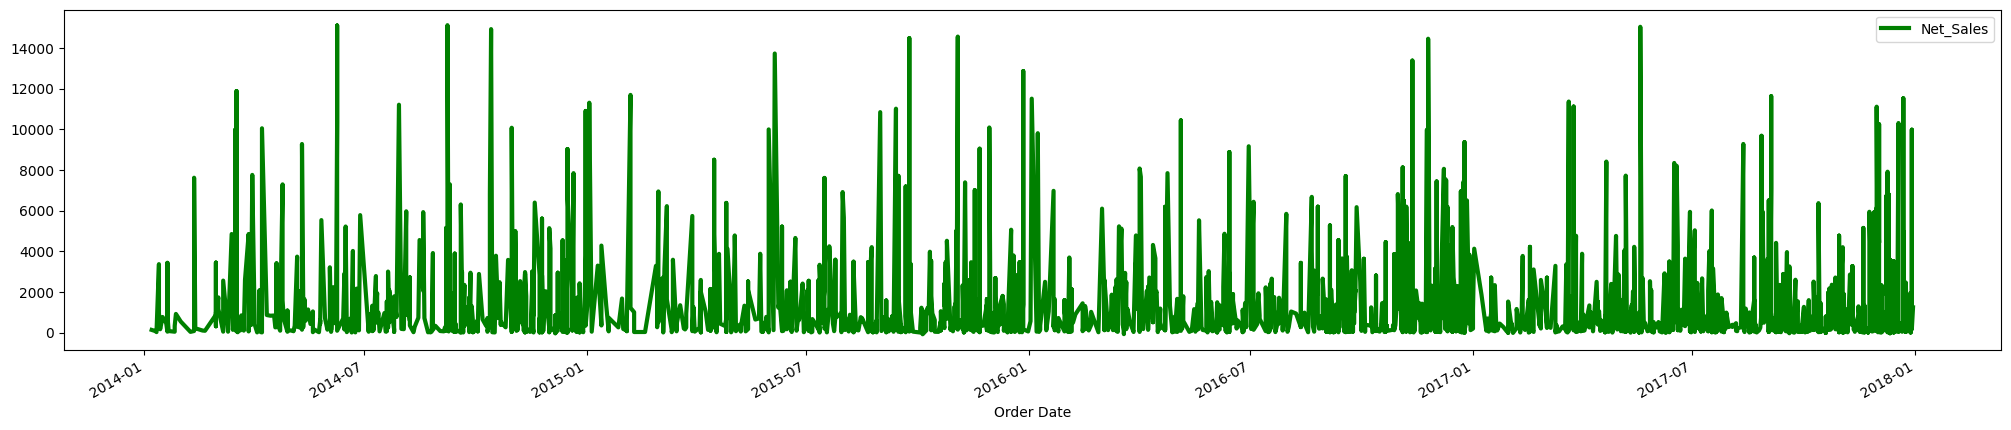

In [45]:
df.plot(figsize=(25,5),color='g',linewidth=3)

In [46]:
tf = df['Net_Sales'].resample('M').sum()

<Axes: xlabel='Order Date'>

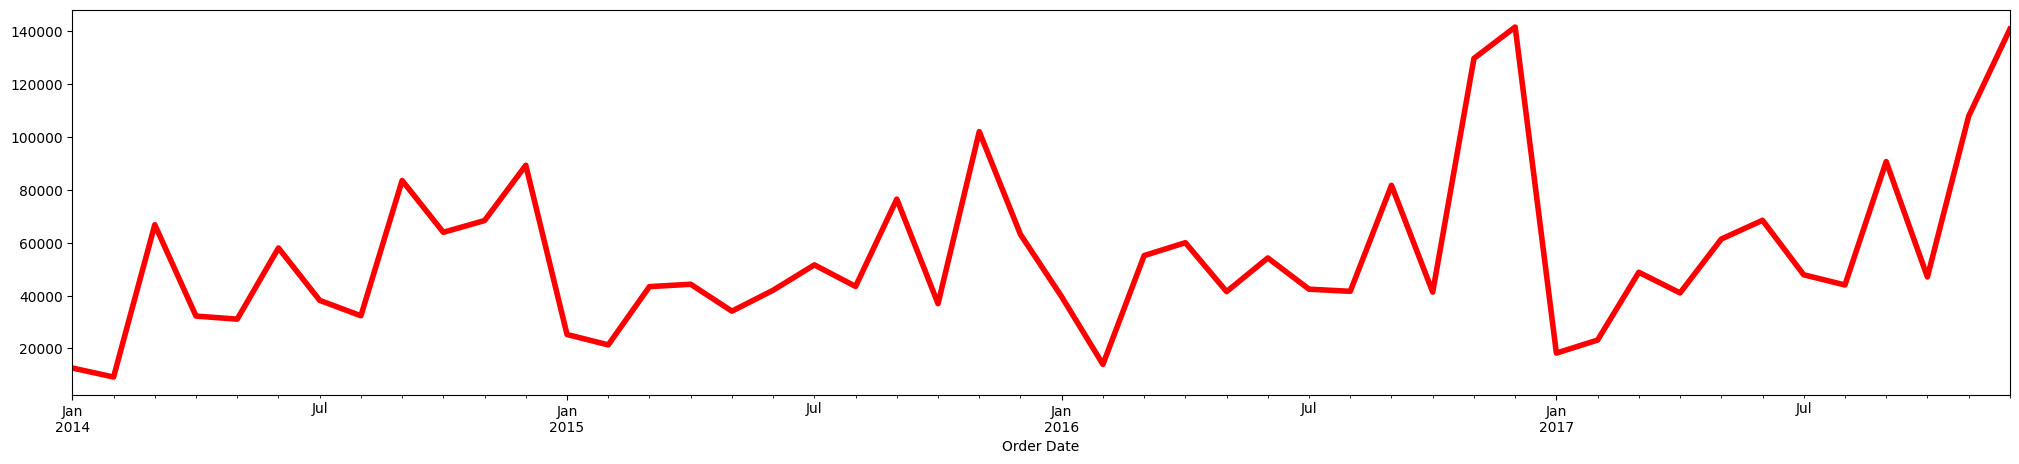

In [47]:
tf.plot(figsize=(25,5),color='r',linewidth=4)

## Decomposition

In [48]:
import statsmodels.api as sm

<Figure size 2500x500 with 0 Axes>

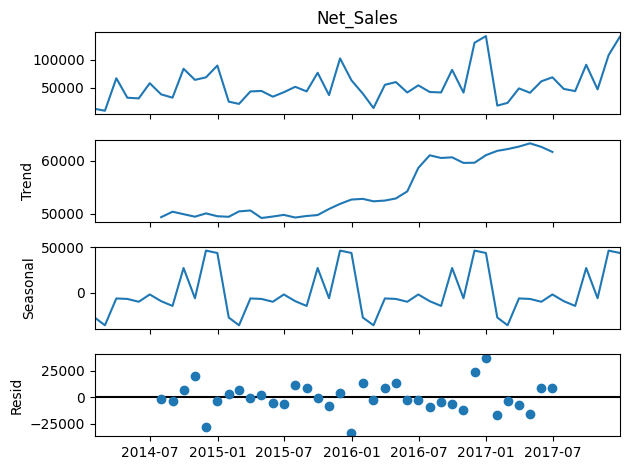

In [49]:
decomposition = sm.tsa.seasonal_decompose(tf)
plt.figure(figsize=(25,5))
fig= decomposition.plot()
plt.show()

## Stationarity Check

In [50]:
from statsmodels.tsa.stattools import adfuller

In [51]:
def adf_test(series):
    result = adfuller(series)
    print('Adfuller Statistics : {}'.format(result[0]))
    print('P - Value : {}'.format(result[1]))
    if result[1] <= 0.05:
        print('Rejection of Null Hypothesis & Data is Stationary')
    else:
        print('Acceptance of Null Hypothesis & Data is Non-Stationary')

In [52]:
adf_test(tf)

Adfuller Statistics : -4.858153183256583
P - Value : 4.2040708496700257e-05
Rejection of Null Hypothesis & Data is Stationary


In [53]:
adfuller(tf)

(-4.858153183256583,
 4.2040708496700257e-05,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 874.8585534021505)

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

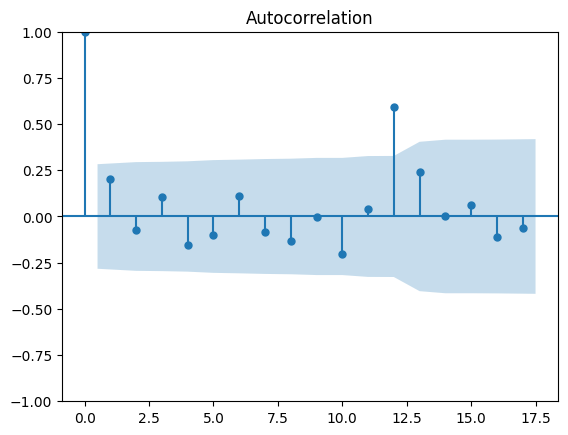

In [55]:
acf = plot_acf(tf)

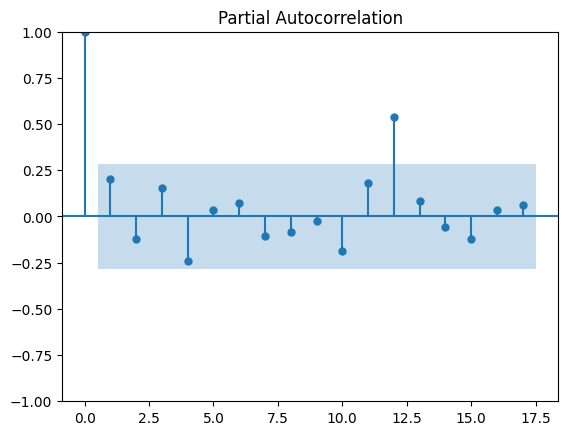

In [56]:
pacf = plot_pacf(tf)

## Train Test Split

In [57]:
from datetime import datetime,timedelta

In [58]:
tf

Order Date
2014-01-31     12587.3597
2014-02-28      9172.0577
2014-03-31     66813.6830
2014-04-30     32246.6451
2014-05-31     31078.8794
2014-06-30     58013.9463
2014-07-31     38194.0517
2014-08-31     32357.4976
2014-09-30     83566.2538
2014-10-31     63950.5685
2014-11-30     68402.9059
2014-12-31     89334.7525
2015-01-31     25262.7656
2015-02-28     21340.2728
2015-03-31     43392.3287
2015-04-30     44289.7747
2015-05-31     34098.8732
2015-06-30     42026.7213
2015-07-31     51627.1722
2015-08-31     43467.5777
2015-09-30     76516.2623
2015-10-31     36936.5492
2015-11-30    102059.3617
2015-12-31     63140.0061
2016-01-31     39539.2435
2016-02-29     13956.5162
2016-03-31     55136.9300
2016-04-30     60023.3514
2016-05-31     41504.7859
2016-06-30     54235.6455
2016-07-31     42419.5315
2016-08-31     41615.9734
2016-09-30     81742.4298
2016-10-31     41313.7442
2016-11-30    129767.7942
2016-12-31    141659.7021
2017-01-31     18225.4832
2017-02-28     23161.3543
2

In [59]:
train_df_end = datetime(2017,2,28)
test_df_end = datetime(2017,12,31)

In [60]:
train_data = tf[:train_df_end]
test_data = tf[train_df_end+timedelta(days=1):test_df_end]

In [61]:
train_data.shape

(38,)

In [62]:
test_data.shape

(10,)

In [63]:
prediction_start_date = test_data.index[0]
prediction_end_date = test_data.index[1]

## SARIMAX Model

In [64]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
model_SARIMA=SARIMAX(train_data,order=(12,0,12),seasonal_order=(0,1,0,2))

In [66]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Net_Sales   No. Observations:                   38
Model:             SARIMAX(12, 0, 12)x(0, 1, [], 2)   Log Likelihood                -422.234
Date:                              Wed, 17 Apr 2024   AIC                            894.468
Time:                                      20:01:35   BIC                            934.056
Sample:                                  01-31-2014   HQIC                           908.285
                                       - 02-28-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3573    461.543      0.001      0.999    -904.250     904.965
ar.L2         -0.7947    385.541     -0.002      0.998    -756.441     754.852
ar.L3          0.1204    508.450      0.000      1.000    -996.423     996.664
ar.L4         -0.3915    277.555     -0.001      0.999    -544.390     543.607
ar.L5         -0.3069    264.258     -0.001      0.999    -518.244     517.630
ar.L6          0.0039    148.751    2.6e-05      1.000    -291.544     291.551
ar.L7         -0.6189    151.140     -0.004      0.997    -296.848     295.610
ar.L8          0.0958    395.164      0.000      1.000    -774.412     774.604
ar.L9         -0.3930    278.485     -0.001      0.999    -546.213     545.427
ar.L10        -0.3922    330.542     -0.001      0.999    -648.242     647.457
ar.L11        -0.0303     11.532     -0.003      0.998     -22.633      22.572
ar.L12        -0.0338     16.374     -0.002      0.998     -32.126      32.058
ma.L1         -0.0728    462.031     -0.000      1.000    -905.636     905.491
ma.L2         -0.0025    256.949  -9.74e-06      1.000    -503.614     503.609
ma.L3          0.3851     88.120      0.004      0.997    -172.327     173.098
ma.L4         -0.4331    170.711     -0.003      0.998    -335.021     334.155
ma.L5          0.2459    301.424      0.001      0.999    -590.535     591.027
ma.L6         -0.1171    264.942     -0.000      1.000    -519.395     519.160
ma.L7          0.3568    181.976      0.002      0.998    -356.309     357.023
ma.L8          0.2567    245.020      0.001      0.999    -479.973     480.486
ma.L9         -0.2031     48.239     -0.004      0.997     -94.751      94.344
ma.L10         0.2500    131.422      0.002      0.998    -257.333     257.833
ma.L11        -0.0981    188.969     -0.001      1.000    -370.470     370.274
ma.L12        -0.1523    140.839     -0.001      0.999    -276.193     275.888
sigma2      1.443e+09      0.000   2.91e+12      0.000    1.44e+09    1.44e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.82   Prob(JB):                         0.76
Heteroskedasticity (H):               1.38   Skew:                            -0.20
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.24e+29. Standard errors may be unstable.
"""

In [68]:
test_data.tail()

Order Date
2017-08-31     44015.7570
2017-09-30     90720.6660
2017-10-31     47050.7512
2017-11-30    107858.4385
2017-12-31    140811.6044
Freq: M, Name: Net_Sales, dtype: float64

In [69]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2017-03-31 00:00:00
2017-12-31 00:00:00


In [70]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2017,3,31),end=datetime(2017,12,31))
residuals=test_data-pred_Sarima

<Axes: xlabel='Order Date'>

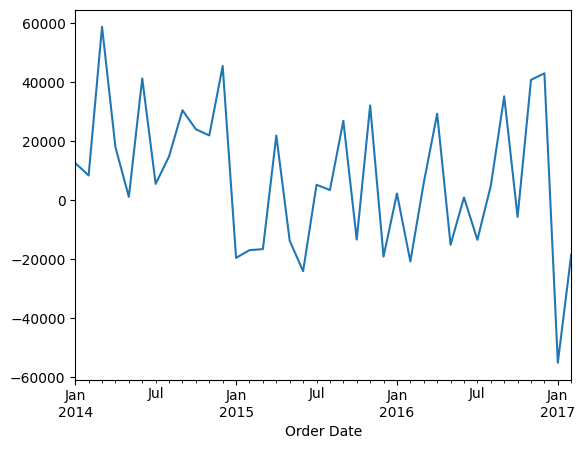

In [71]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

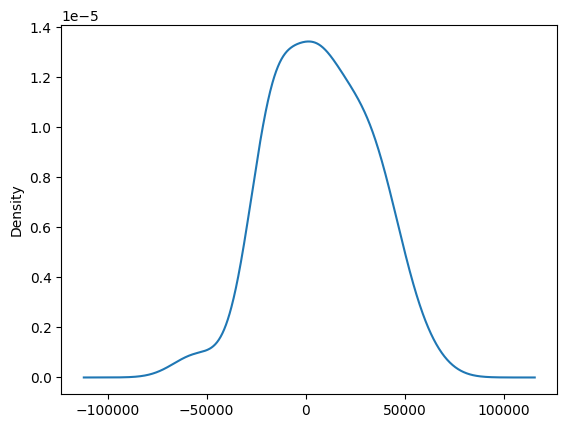

In [72]:
model_SARIMA_fit.resid.plot(kind='kde')

In [73]:
test_data

Order Date
2017-03-31     48821.7008
2017-04-30     41012.4083
2017-05-31     61396.0901
2017-06-30     68496.9883
2017-07-31     47871.2064
2017-08-31     44015.7570
2017-09-30     90720.6660
2017-10-31     47050.7512
2017-11-30    107858.4385
2017-12-31    140811.6044
Freq: M, Name: Net_Sales, dtype: float64

In [74]:
pred_Sarima

2017-03-31    57117.246348
2017-04-30    23557.348854
2017-05-31    61703.201551
2017-06-30    68242.657669
2017-07-31    61450.507243
2017-08-31    59482.910749
2017-09-30    41119.122810
2017-10-31    21893.702889
2017-11-30    97932.672372
2017-12-31    95910.785651
Freq: M, Name: predicted_mean, dtype: float64

<Axes: xlabel='Order Date'>

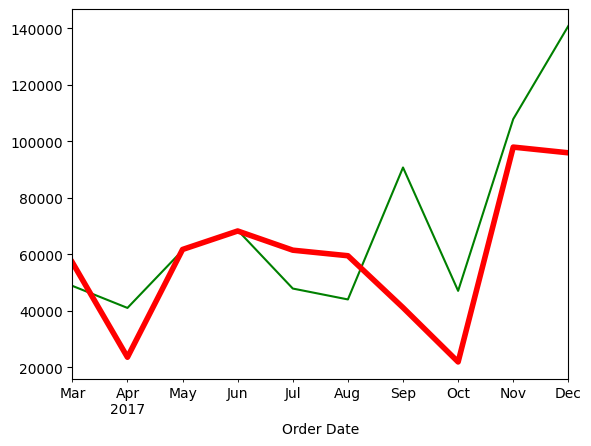

In [75]:
test_data.plot(color='g')
pred_Sarima.plot(color='r',linewidth=4)

## ARIMA Model

In [76]:
from statsmodels.tsa.arima.model import ARIMA

In [77]:
model_ARIMA=ARIMA(train_data,order=(12,0,12))

In [78]:
model_Arima_fit=model_ARIMA.fit()

C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Net_Sales   No. Observations:                   38
Model:               ARIMA(12, 0, 12)   Log Likelihood                -436.765
Date:                Wed, 17 Apr 2024   AIC                            925.530
Time:                        20:01:38   BIC                            968.107
Sample:                    01-31-2014   HQIC                           940.678
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.143e+04   2.33e+04      2.202      0.028    5662.708    9.72e+04
ar.L1          0.0446     63.759      0.001      0.999    -124.921     125.011
ar.L2          0.0709     38.564      0.002      0.999     -75.513      75.655
ar.L3         -0.1137     22.517     -0.005      0.996     -44.246      44.019
ar.L4         -0.0883     18.598     -0.005      0.996     -36.539      36.363
ar.L5         -0.1911     29.259     -0.007      0.995     -57.539      57.156
ar.L6          0.0219     25.606      0.001      0.999     -50.165      50.208
ar.L7         -0.1134     35.953     -0.003      0.997     -70.580      70.353
ar.L8         -0.1257     28.748     -0.004      0.997     -56.472      56.220
ar.L9          0.0416     50.797      0.001      0.999     -99.519      99.602
ar.L10        -0.2682     42.300     -0.006      0.995     -83.175      82.639
ar.L11         0.0150     63.710      0.000      1.000    -124.855     124.885
ar.L12         0.5758     47.499      0.012      0.990     -92.521      93.673
ma.L1         -0.0508     64.694     -0.001      0.999    -126.849     126.747
ma.L2         -0.0576     39.471     -0.001      0.999     -77.420      77.305
ma.L3          0.2774     22.883      0.012      0.990     -44.573      45.128
ma.L4         -0.1096     27.003     -0.004      0.997     -53.035      52.816
ma.L5         -0.1147     33.478     -0.003      0.997     -65.730      65.500
ma.L6         -0.0039     22.446     -0.000      1.000     -43.996      43.989
ma.L7          0.2305     31.701      0.007      0.994     -61.902      62.363
ma.L8          0.1507     26.176      0.006      0.995     -51.153      51.454
ma.L9         -0.2150     48.371     -0.004      0.996     -95.020      94.590
ma.L10         0.0598     45.648      0.001      0.999     -89.409      89.529
ma.L11         0.0220     48.083      0.000      1.000     -94.219      94.263
ma.L12        -0.3517     37.207     -0.009      0.992     -73.276      72.573
sigma2      8.586e+08        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.67
Prob(Q):                              0.93   Prob(JB):                         0.06
Heteroskedasticity (H):               2.22   Skew:                             0.90
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.97e+31. Standard errors may be unstable.
"""

In [80]:
test_data

Order Date
2017-03-31     48821.7008
2017-04-30     41012.4083
2017-05-31     61396.0901
2017-06-30     68496.9883
2017-07-31     47871.2064
2017-08-31     44015.7570
2017-09-30     90720.6660
2017-10-31     47050.7512
2017-11-30    107858.4385
2017-12-31    140811.6044
Freq: M, Name: Net_Sales, dtype: float64

In [81]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2017-03-31 00:00:00
2017-12-31 00:00:00


In [82]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-pred

In [83]:
pred

2017-03-31     50364.805672
2017-04-30     17496.089978
2017-05-31     29502.263624
2017-06-30     62749.305225
2017-07-31     51706.016754
2017-08-31     45993.676918
2017-09-30     40555.626039
2017-10-31     34824.171265
2017-11-30     92429.839531
2017-12-31    100199.234002
Freq: M, Name: predicted_mean, dtype: float64

In [84]:
residuals

Order Date
2017-03-31    -1543.104872
2017-04-30    23516.318322
2017-05-31    31893.826476
2017-06-30     5747.683075
2017-07-31    -3834.810354
2017-08-31    -1977.919918
2017-09-30    50165.039961
2017-10-31    12226.579935
2017-11-30    15428.598969
2017-12-31    40612.370398
Freq: M, dtype: float64

<Axes: ylabel='Density'>

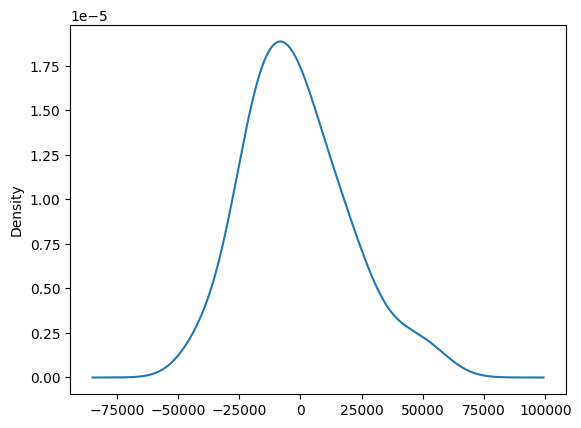

In [85]:
model_Arima_fit.resid.plot(kind='kde')

<Axes: xlabel='Order Date'>

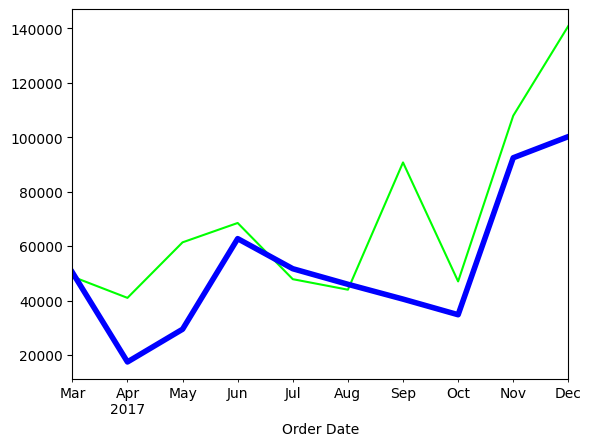

In [86]:
test_data.plot(color='lime')
pred.plot(color='blue',linewidth=4)